In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment',  None) # Warning 방지용
import numpy as np

# 경고(worning) 비표시
import warnings
warnings.filterwarnings('ignore')

> ### 데이터 전처리

In [2]:
consumption = pd.read_csv('./data/DATA_SSC_CORONA_MERS.csv')
consumption

,소비일자,소비업종,성별,연령대,소비건수합계
0,20150629,편의점,여성,50대,77585
1,20200501,편의점,남성,40대,570937
2,20190531,주유,여성,50대,93502
3,20150508,요식/유흥,남성,30대,950842
4,20200613,교육/학원,여성,20대,14199
...,...,...,...,...,...
38635,20190527,가전/가구,남성,20대,15962
38636,20200720,자동차,남성,30대,36500
38637,20190731,자동차,여성,20대,7328
38638,20150721,여행/교통,여성,30대,35275


In [3]:
data1 = pd.read_csv('./data/2020년 1분기/all.csv')
data2 = pd.read_csv('./data/2020년 2분기/all.csv')
data3 = pd.read_csv('./data/2020년 3분기/all.csv')
data4 = pd.read_csv('./data/2020년 4분기/all.csv')

In [4]:
data1 = data1[['공연일시', '입장권고유번호', '예매일시', '예매/취소구분', '성별', '연령', '연령대', '장르명']]
data2 = data2[['공연일시', '입장권고유번호', '예매일시', '예매/취소구분', '성별', '연령', '연령대', '장르명']]
data3 = data3[['공연일시', '입장권고유번호', '예매일시', '예매/취소구분', '성별', '연령', '연령대', '장르명']]
data4 = data4[['공연일시', '입장권고유번호', '예매일시', '예매/취소구분', '성별', '연령', '연령대', '장르명']]

In [5]:
data = data1.append(data2, ignore_index = True)
data = data.append(data3, ignore_index = True)
data = data.append(data4, ignore_index = True)
len(data)

6805772

In [6]:
format = '%Y-%m-%dT%H:%M'
data['예매일시'] = pd.to_datetime(data['예매일시'], format = format)

In [7]:
data['예매일시_년'] = data['예매일시'].dt.year
data['예매일시_월'] = data['예매일시'].dt.month
data['예매일시_일'] = data['예매일시'].dt.day
data['예매일시_날짜'] = data['예매일시'].dt.date

In [8]:
data = data[data['예매일시_년'] == 2020]
data = data[(data['예매일시_월'] == 5) | (data['예매일시_월'] == 6) | (data['예매일시_월'] == 7)]

In [9]:
format = '%Y%m%d'
consumption['소비일자'] = pd.to_datetime(consumption['소비일자'], format = format)
consumption['소비일자_년'] = consumption['소비일자'].dt.year
consumption['소비일자_월'] = consumption['소비일자'].dt.month
consumption['소비일자_일'] = consumption['소비일자'].dt.day
consumption['소비일자'] = consumption['소비일자'].dt.date

In [10]:
consumption = consumption[consumption['소비일자_년'] == 2020]

In [11]:
# 소비건수 데이터 추가하는 함수
def addCol(sector, w_40):
    temp = consumption_40_w[consumption_40_w['소비업종'] == sector][['소비일자', '소비건수합계']]
    temp.set_index('소비일자', inplace = True)
    w_40 = pd.concat([w_40, temp], axis = 1)
    w_40.rename(columns = {'소비건수합계' : '소비건수_' + sector}, inplace = True)
    return w_40

def addCol_50(sector, w_50):
    temp = consumption_50_w[consumption_50_w['소비업종'] == sector][['소비일자', '소비건수합계']]
    temp.set_index('소비일자', inplace = True)
    w_50 = pd.concat([w_50, temp], axis = 1)
    w_50.rename(columns = {'소비건수합계' : '소비건수_' + sector}, inplace = True)
    return w_50

def addCol_4050(sector, corr_4050):
    temp = consumption_sum[consumption_sum['소비업종'] == sector][['소비일자', '소비건수합계']]
    temp.set_index('소비일자', inplace = True)
    corr_4050 = pd.concat([corr_4050, temp], axis = 1)
    corr_4050.rename(columns = {'소비건수합계' : '소비건수_' + sector}, inplace = True)
    return corr_4050

def addCol_p(temp, colName, w_40):
    w_40 = pd.concat([w_40, temp], axis = 1)
    w_40.rename(columns = {'입장권고유번호' : colName}, inplace = True)
    return w_40

def addCol_p_50(temp, colName, w_50):
    w_50 = pd.concat([w_50, temp], axis = 1)
    w_50.rename(columns = {'입장권고유번호' : colName}, inplace = True)
    return w_50

def addCol_p_4050(temp, colName, corr_4050):
    corr_4050 = pd.concat([corr_4050, temp], axis = 1)
    corr_4050.rename(columns = {'입장권고유번호' : colName}, inplace = True)
    return corr_4050

##### 1. 40-50대 전체

In [12]:
# 4050대 데이터 전처리
data_4050 = data[((data['연령대'] == 40) | (data['연령대'] == 50)) & (data['예매/취소구분'] == 1)]
data_4050_group = data_4050.groupby('예매일시_날짜')['입장권고유번호'].count()

consumption = consumption[(consumption['연령대'] == '50대') | (consumption['연령대'] == '40대')]
consumption_sum = consumption.groupby(['소비일자', '소비업종'])['소비건수합계'].sum()
consumption_sum = pd.DataFrame(consumption_sum)
consumption_sum.reset_index(inplace = True)

corr_4050 = consumption_sum[consumption_sum['소비업종'] == '가전/가구']['소비일자']
corr_4050 = pd.DataFrame(corr_4050)
corr_4050.set_index('소비일자', inplace = True)

col_list = consumption_sum['소비업종'].unique()
for i in col_list:
    corr_4050 = addCol_4050(i, corr_4050)

corr_4050 = addCol_p_4050(data_4050_group, '공연_예매건수', corr_4050)

In [13]:
# 데이터 확인
data_4050['예매/취소구분'].unique()
#data_4050['연령대'].unique()
#data_4050['성별'].unique()
#consumption['성별'].unique()
#consumption['연령대'].unique()

array([1], dtype=int64)

In [14]:
corr_4050.to_csv('./data/corr_4050.csv')

##### 2. 40-50대 남성

In [15]:
# 4050대 남성 데이터 전처리
data_4050 = data[data['예매/취소구분'] == 1]
data_4050_m = data_4050[((data_4050['연령대'] == 40) | (data_4050['연령대'] == 50)) & (data_4050['성별'] == 1)]
data_4050_m_group = data_4050_m.groupby('예매일시_날짜')['입장권고유번호'].count()

consumption = consumption[(consumption['연령대'] == '50대') | (consumption['연령대'] == '40대')]
consumption_m = consumption[(consumption['성별'] == '남성')]
consumption_sum = consumption_m.groupby(['소비일자', '소비업종'])['소비건수합계'].sum()
consumption_sum = pd.DataFrame(consumption_sum)
consumption_sum.reset_index(inplace = True)

corr_m_4050 = consumption_sum[consumption_sum['소비업종'] == '가전/가구']['소비일자']
corr_m_4050 = pd.DataFrame(corr_m_4050)
corr_m_4050.set_index('소비일자', inplace = True)

col_list = consumption_sum['소비업종'].unique()
for i in col_list:
    corr_m_4050 = addCol_4050(i, corr_m_4050)

corr_m_4050 = addCol_p_4050(data_4050_m_group, '공연_예매건수', corr_m_4050)

In [16]:
# 데이터 확인
#data_4050_m['예매/취소구분'].unique()
#data_4050_m['연령대'].unique()
#data_4050_m['성별'].unique()
#consumption_m['성별'].unique()
consumption_m['연령대'].unique()

array(['40대', '50대'], dtype=object)

In [ ]:
corr_m_4050.to_csv('./data/corr_m_4050.csv')

##### 3. 40-50대 여성

In [32]:
# 4050대 여성 데이터 전처리
data_4050 = data[data['예매/취소구분'] == 1]
data_4050 = data_4050[(data_4050['연령대'] == 40) | (data_4050['연령대'] == 50)]
data_4050_w = data_4050[(data_4050['성별'] == 2)]
data_4050_w_group = data_4050_w.groupby('예매일시_날짜')['입장권고유번호'].count()

consumption = consumption[(consumption['연령대'] == '50대') | (consumption['연령대'] == '40대')]
consumption_w = consumption[(consumption['성별'] == '여성')]
consumption_sum = consumption_w.groupby(['소비일자', '소비업종'])['소비건수합계'].sum()
consumption_sum = pd.DataFrame(consumption_sum)
consumption_sum.reset_index(inplace = True)

corr_w_4050 = consumption_sum[consumption_sum['소비업종'] == '가전/가구'][['소비일자']]
corr_w_4050.set_index('소비일자', inplace = True)

col_list = consumption_sum['소비업종'].unique()
for i in col_list:
    corr_w_4050 = addCol_4050(i, corr_w_4050)
    
corr_w_4050 = addCol_p_4050(data_4050_w_group, '공연_예매건수', corr_w_4050)

In [33]:
# 데이터 확인
data_4050_w['예매/취소구분'].unique()
data_4050_w['연령대'].unique()
data_4050_w['성별'].unique()
consumption_w['성별'].unique()
consumption_w['연령대'].unique()

array(['50대', '40대'], dtype=object)

In [ ]:
corr_w_4050.to_csv('./data/corr_w_4050.csv')

##### 4. 40대 여성

In [19]:
# 40대 여성 데이터 전처리
consumption_40_w = consumption[(consumption['성별'] == '여성') & (consumption['연령대'] == '40대')]
consumption_40_w.sort_values(by = '소비일자', ascending = True, inplace = True)
w_40 = consumption_40_w[consumption_40_w['소비업종'] == '할인점/마트'][['소비일자']]
w_40.set_index('소비일자', inplace = True)

sectorList = consumption['소비업종'].unique()
for i in sectorList:
    w_40 = addCol(i, w_40)
    
data_40_w = data[(data['연령대'] == 40) & (data['성별'] == 2) & (data['예매/취소구분'] == 1)]
data_40_w_group = data_40_w.groupby('예매일시_날짜')['입장권고유번호'].count()

w_40 = addCol_p(data_40_w_group, '공연_예매건수', w_40)

In [ ]:
# 데이터 확인
#data_40_w['예매/취소구분'].unique()
#data_40_w['연령대'].unique()
#data_40_w['성별'].unique()
#consumption_40_w['성별'].unique()
consumption_40_w['연령대'].unique()

In [ ]:
w_40.to_csv('./data/corr_w_40_2.csv')

##### 5. 50대 여성

In [20]:
# 50대 여성 데이터 전처리
consumption_50_w = consumption[(consumption['성별'] == '여성') & (consumption['연령대'] == '50대')]
consumption_50_w.sort_values(by = '소비일자', ascending = True, inplace = True)
w_50 = consumption_50_w[consumption_50_w['소비업종'] == '할인점/마트'][['소비일자']]
w_50.set_index('소비일자', inplace = True)

sectorList = consumption['소비업종'].unique()
for i in sectorList:
    w_50 = addCol_50(i, w_50)
    
data_w_50 = data[(data['성별'] == 2) & (data['연령대'] == 50) & (data['예매/취소구분'] == 1)]
data_w_50_group = data_w_50.groupby('예매일시_날짜')['입장권고유번호'].count()

w_50 = addCol_p_50(data_w_50_group, '공연_예매건수', w_50)

In [21]:
# 데이터 확인
#data_w_50['예매/취소구분'].unique()
#data_w_50['연령대'].unique()
#data_w_50['성별'].unique()
#consumption_50_w['성별'].unique()
consumption_50_w['연령대'].unique()

array(['50대'], dtype=object)

In [ ]:
w_50.to_csv('./data/corr_w_50.csv')

> ### 다중회귀분석

##### 1. 40-50대 전체

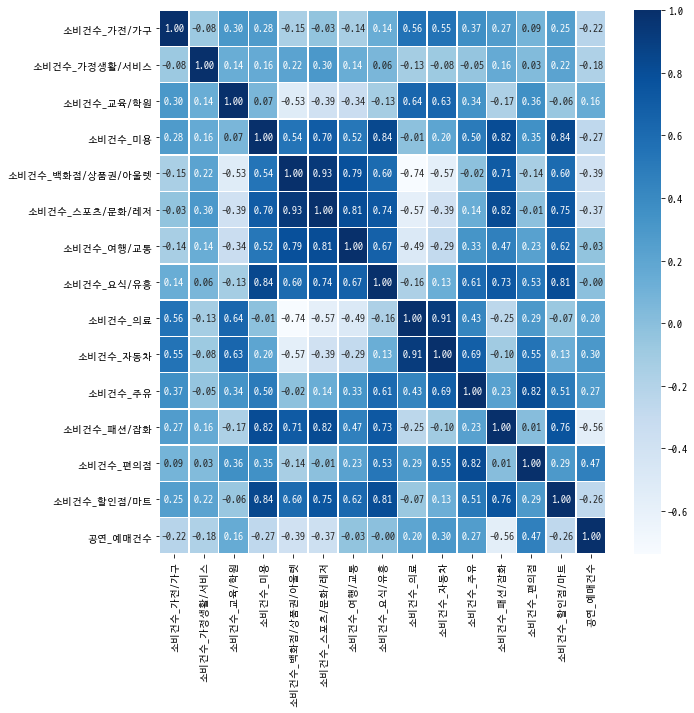

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'D2Coding'

# 데이터 불러오기
corr_4050 = pd.read_csv('./data/corr_4050.csv', index_col = 0)

plt.figure(figsize = (10, 10))
sns.heatmap(data = corr_4050.corr(), annot = True, fmt = '.2f', linewidths = .5, cmap = 'Blues')
plt.show()

In [22]:
import statsmodels.api as sm

x_data = corr_4050.drop('공연_예매건수', axis = 1) # 변수 n개
target = corr_4050['공연_예매건수']

# 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data1.values, i) for i in range(x_data1.shape[1])]
vif["features"] = x_data1.columns
vif

,VIF Factor,features
0,134.789083,const
1,1.367726,소비건수_여행/교통
2,1.297789,소비건수_패션/잡화
3,1.066281,소비건수_편의점


In [24]:
x_data = corr_4050.drop(['공연_예매건수', '소비건수_스포츠/문화/레저','소비건수_의료', '소비건수_백화점/상품권/아울렛', '소비건수_요식/유흥', '소비건수_미용', '소비건수_할인점/마트', '소비건수_교육/학원', '소비건수_주유', '소비건수_자동차', '소비건수_가전/가구', '소비건수_가정생활/서비스'], axis = 1)
x_data1 = sm.add_constant(x_data, has_constant = "add")

In [26]:
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                공연_예매건수   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     37.41
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           1.11e-15
Time:                        18:43:23   Log-Likelihood:                -762.92
No. Observations:                  92   AIC:                             1534.
Df Residuals:                      88   BIC:                             1544.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1196.7868   1196.204     -1.000      0.320   -3573.991    1180.418
소비건수_여행/교통     0.0082      0.004      2.076      0.041       0.000       0.016
소비건수_패션/잡화    -0.0303      0.004     -8.027      0.000      -0.038      -0.023
소비건수_편의점       0.0050      0.001      6.002      0.000       0.003       0.007
==============================================================================
Omnibus:                       11.096   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.334
Skew:                           0.817   Prob(JB):                      0.00346
Kurtosis:                       3.535   Cond. No.                     1.61e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

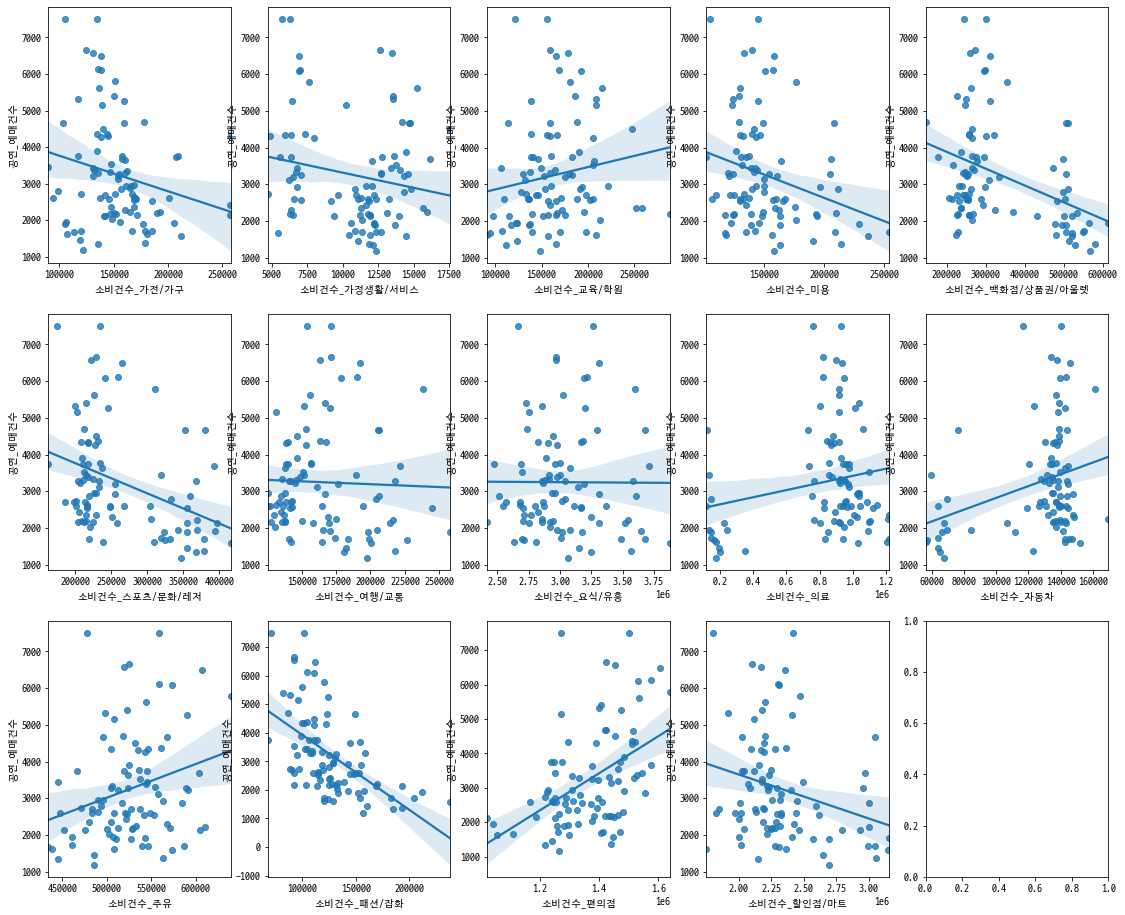

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'D2Coding'

fig, axs = plt.subplots(figsize = (19, 16), ncols = 5, nrows = 3)
x_features = corr_4050.drop('공연_예매건수', axis = 1).columns

for i, feature in enumerate(x_features):
    row = int(i / 5)
    col = i % 5
    sns.regplot(x = feature, y = '공연_예매건수', data = corr_4050, ax = axs[row][col])

##### 2. 40-50대 남성

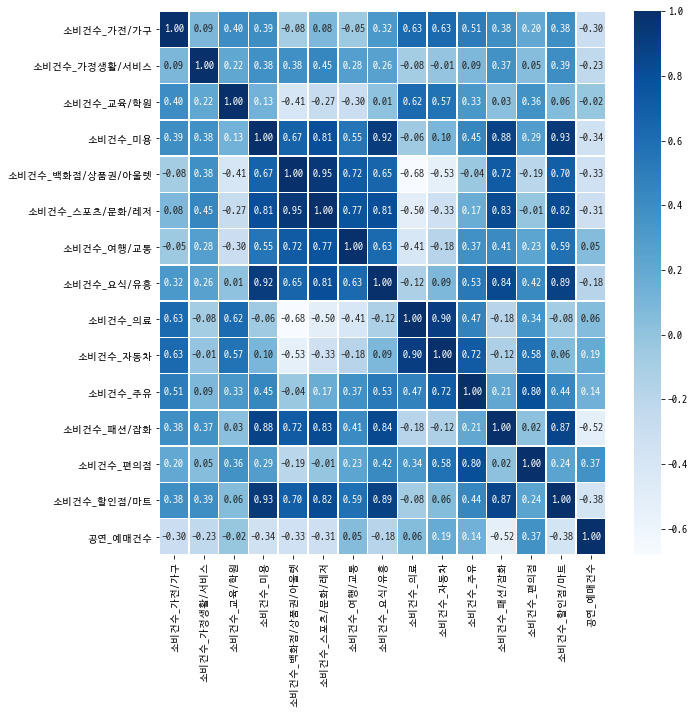

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'D2Coding'

# 데이터 불러오기
corr_m_4050 = pd.read_csv('./data/corr_m_4050.csv', index_col = 0)

plt.figure(figsize = (10, 10))
sns.heatmap(data = corr_m_4050.corr(), annot = True, fmt = '.2f', linewidths = .5, cmap = 'Blues')
plt.show()

In [9]:
import statsmodels.api as sm

x_data = corr_m_4050.drop('공연_예매건수', axis = 1) # 변수 n개
target = corr_m_4050['공연_예매건수']

# 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

In [28]:
# VIF를 통한 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data1.values, i) for i in range(x_data1.shape[1])]
vif["features"] = x_data1.columns
vif

,VIF Factor,features
0,138.125286,const
1,1.282648,소비건수_여행/교통
2,1.216691,소비건수_패션/잡화
3,1.062271,소비건수_편의점


In [27]:
x_data = corr_m_4050.drop(['공연_예매건수', '소비건수_스포츠/문화/레저', '소비건수_백화점/상품권/아울렛',
                           '소비건수_요식/유흥', '소비건수_자동차', '소비건수_미용',
                           '소비건수_교육/학원', '소비건수_주유', '소비건수_의료',
                           '소비건수_가정생활/서비스', '소비건수_할인점/마트', '소비건수_가전/가구'], axis = 1)
x_data1 = sm.add_constant(x_data, has_constant = "add")

In [12]:
# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                공연_예매건수   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     24.19
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           1.65e-11
Time:                        15:13:25   Log-Likelihood:                -618.59
No. Observations:                  92   AIC:                             1245.
Df Residuals:                      88   BIC:                             1255.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -323.6474    252.219     -1.283      0.203    -824.879     177.584
소비건수_여행/교통     0.0036      0.001      2.603      0.011       0.001       0.006
소비건수_패션/잡화    -0.0081      0.001     -7.129      0.000      -0.010      -0.006
소비건수_편의점       0.0011      0.000      4.001      0.000       0.001       0.002
==============================================================================
Omnibus:                       22.193   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.324
Skew:                           1.174   Prob(JB):                     4.29e-07
Kurtosis:                       4.460   Cond. No.                     1.11e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

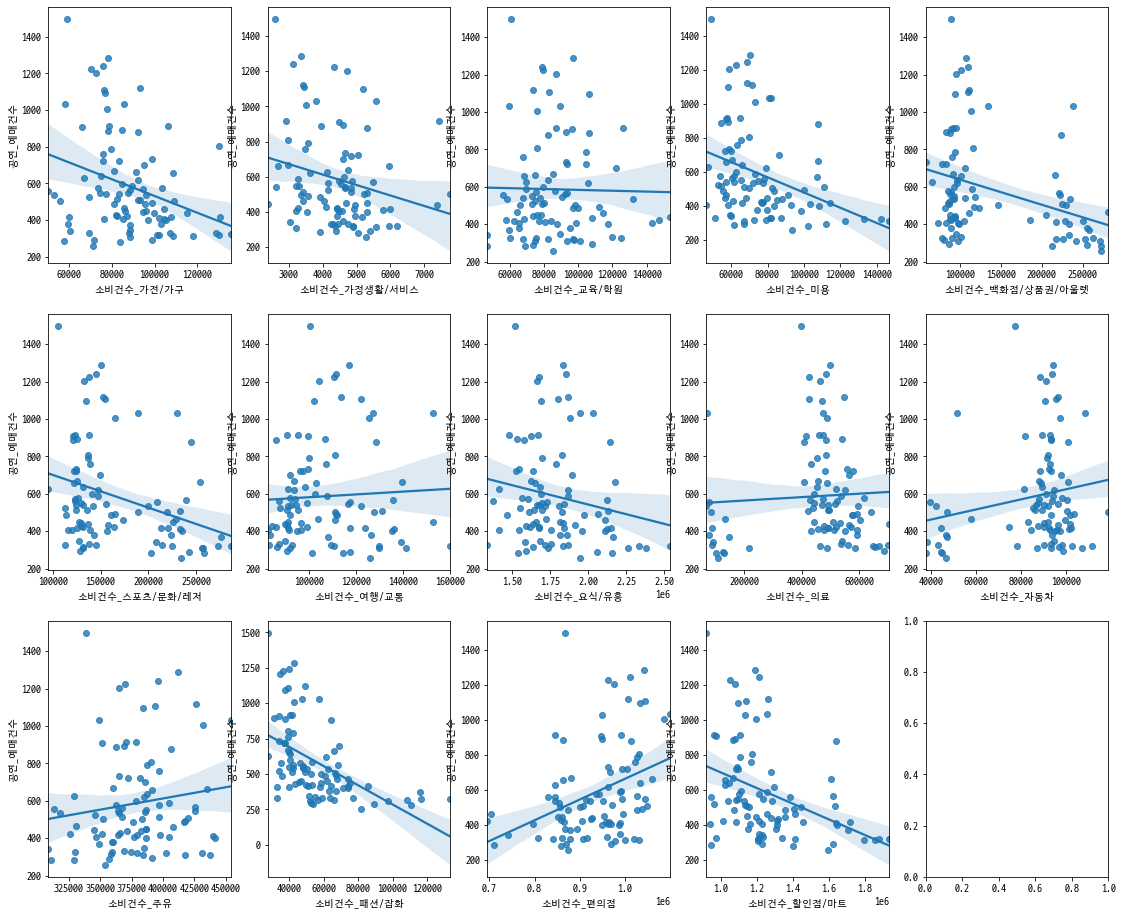

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'D2Coding'

fig, axs = plt.subplots(figsize = (19, 16), ncols = 5, nrows = 3)
x_features = corr_m_4050.drop('공연_예매건수', axis = 1).columns

for i, feature in enumerate(x_features):
    row = int(i / 5)
    col = i % 5
    sns.regplot(x = feature, y = '공연_예매건수', data = corr_m_4050, ax = axs[row][col])

##### 3. 40-50대 여성

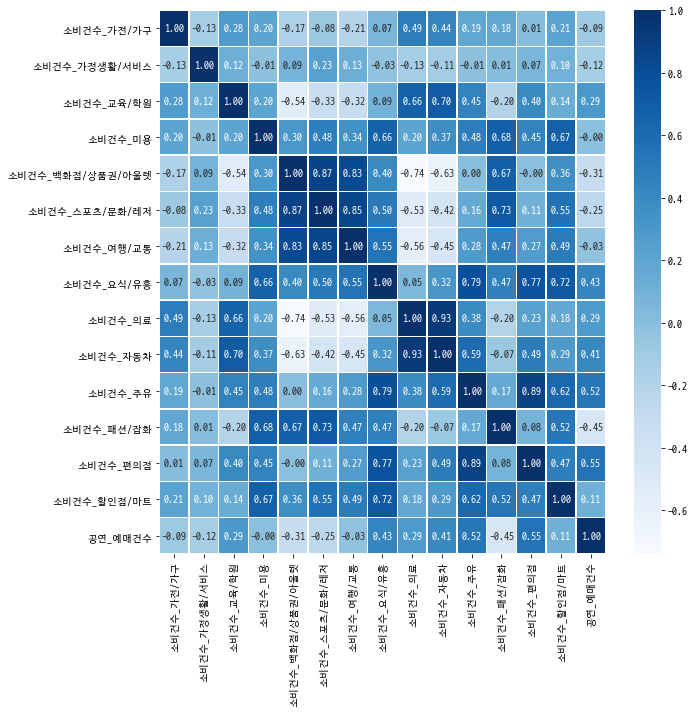

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'D2Coding'

# 데이터 불러오기
corr_w_4050 = pd.read_csv('./data/corr_w_4050.csv', index_col = 0)

plt.figure(figsize = (10, 10))
sns.heatmap(data = corr_w_4050.corr(), annot = True, fmt = '.2f', linewidths = .5, cmap = 'Blues')
plt.show()

In [34]:
import statsmodels.api as sm

x_data = corr_w_4050.drop(['공연_예매건수'], axis = 1)
target = corr_w_4050['공연_예매건수']

# 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data1.values, i) for i in range(x_data1.shape[1])]
vif["features"] = x_data1.columns
vif

,VIF Factor,features
0,213.617357,const
1,1.645459,소비건수_가전/가구
2,1.531972,소비건수_가정생활/서비스
3,2.833718,소비건수_교육/학원
4,4.329119,소비건수_미용
5,18.671050,소비건수_백화점/상품권/아울렛
6,13.115213,소비건수_스포츠/문화/레저
7,9.825571,소비건수_여행/교통
8,10.676407,소비건수_요식/유흥
9,24.374509,소비건수_의료


In [35]:
x_data = corr_w_4050.drop(['공연_예매건수', '소비건수_자동차', '소비건수_백화점/상품권/아울렛', '소비건수_스포츠/문화/레저', '소비건수_주유', '소비건수_미용', '소비건수_의료', '소비건수_가전/가구', '소비건수_교육/학원', '소비건수_편의점', '소비건수_할인점/마트', '소비건수_가정생활/서비스'], axis = 1)
x_data1 = sm.add_constant(x_data, has_constant = "add")

In [36]:
# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                공연_예매건수   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     83.72
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           1.08e-25
Time:                        18:46:49   Log-Likelihood:                -708.40
No. Observations:                  92   AIC:                             1425.
Df Residuals:                      88   BIC:                             1435.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2222.6588    629.543     -3.531      0.001   -3473.744    -971.574
소비건수_여행/교통    -0.0112      0.005     -2.038      0.045      -0.022      -0.000
소비건수_요식/유흥     0.0080      0.001     12.968      0.000       0.007       0.009
소비건수_패션/잡화    -0.0675      0.005    -12.392      0.000      -0.078      -0.057
==============================================================================
Omnibus:                        9.373   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.334
Skew:                           0.659   Prob(JB):                      0.00940
Kurtosis:                       3.836   Cond. No.                     1.38e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

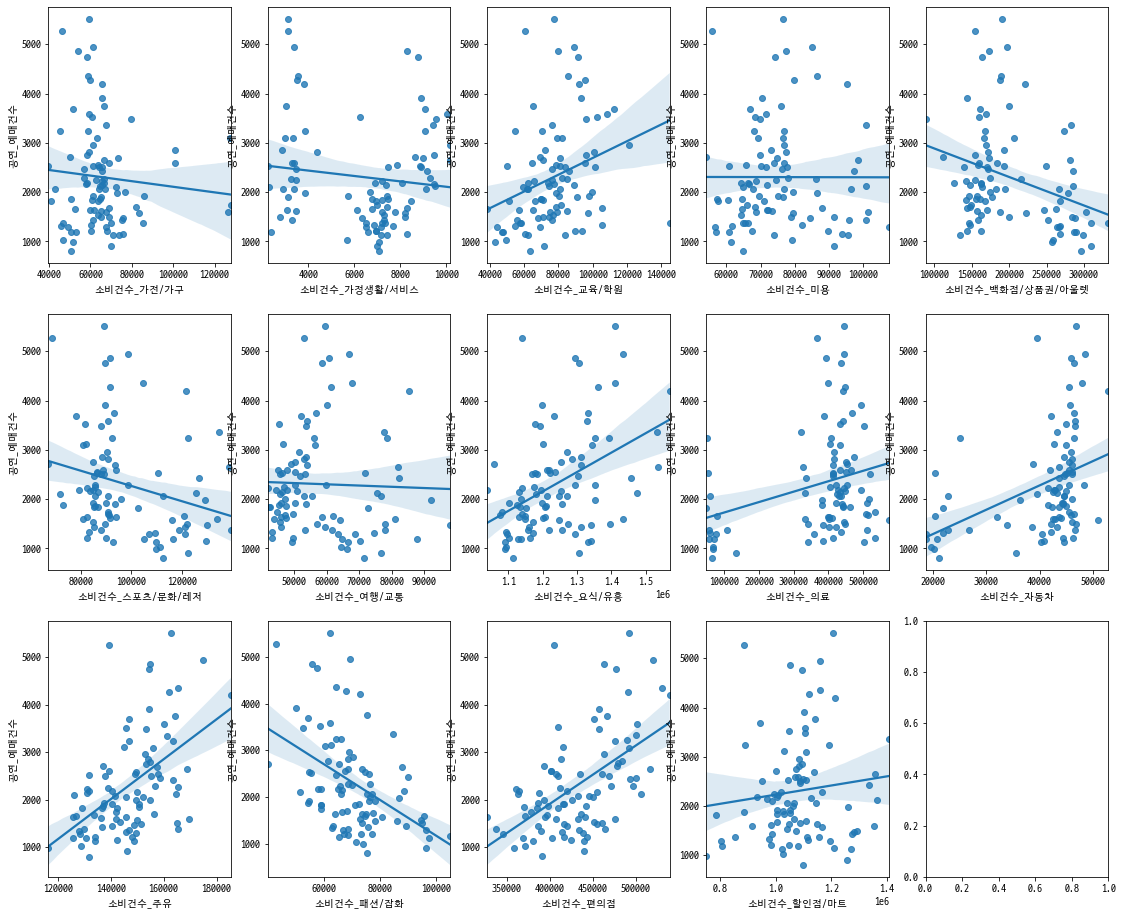

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'D2Coding'

fig, axs = plt.subplots(figsize = (19, 16), ncols = 5, nrows = 3)
x_features = corr_w_4050.drop('공연_예매건수', axis = 1).columns

for i, feature in enumerate(x_features):
    row = int(i / 5)
    col = i % 5
    sns.regplot(x = feature, y = '공연_예매건수', data = corr_w_4050, ax = axs[row][col])

##### 4. 40대 여성

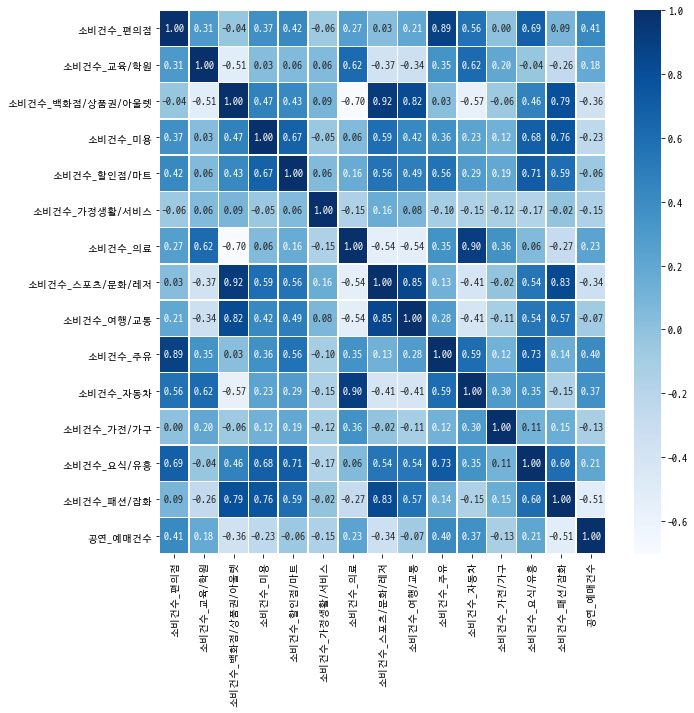

In [20]:
# 상관관계 확인

# 데이터 불러오기
corr_w_40 = pd.read_csv('./data/corr_w_40_2.csv', index_col = 0)

import seaborn as sns # heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'D2Coding'
plt.figure(figsize = (10, 10))
sns.heatmap(data = corr_w_40.corr(), annot = True, fmt = '.2f', linewidths = .5, cmap = 'Blues')
plt.show()

In [62]:
# OLS 검정
multi_model = sm.OLS(dfY, dfX)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PER   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           1.91e-38
Time:                        23:57:31   Log-Likelihood:                -1055.2
No. Observations:                  92   AIC:                             2122.
Df Residuals:                      86   BIC:                             2138.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       7.31e+05   2499.212    292.503      0.000    7.26e+05    7.36e+05
scale(EDU)     2.572e+04   3549.505      7.247      0.000    1.87e+04    3.28e+04
scale(BEAUTY)   1.34e+04   3563.297      3.760      0.000    6314.563    2.05e+04
scale(HOME)    2.608e+04   3143.081      8.298      0.000    1.98e+04    3.23e+04
scale(SPORTS) -6191.8826   2576.001     -2.404      0.018   -1.13e+04   -1070.962
scale(CAR)     4.318e+04   3945.644     10.942      0.000    3.53e+04     5.1e+04
==============================================================================
Omnibus:                        4.421   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                4.121
Skew:                           0.518   Prob(JB):                        0.127
Kurtosis:                       3.023   Cond. No.                         2.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# VIF를 통한 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data1.values, i) for i in range(x_data1.shape[1])]
vif["features"] = x_data1.columns
vif

,VIF Factor,features
0,124.319754,const
1,1.551340,소비건수_요식/유흥
2,1.551340,소비건수_패션/잡화


In [7]:
x_data = corr_w_40.drop(['공연_예매건수', '소비건수_자동차', '소비건수_백화점/상품권/아울렛', '소비건수_스포츠/문화/레저', '소비건수_미용', '소비건수_여행/교통', '소비건수_가정생활/서비스', '소비건수_교육/학원', '소비건수_주유', '소비건수_할인점/마트', '소비건수_가전/가구', '소비건수_편의점', '소비건수_의료'], axis = 1)
x_data1 = sm.add_constant(x_data, has_constant = "add")

In [9]:
# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                공연_예매건수   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     94.81
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           8.81e-23
Time:                        19:12:08   Log-Likelihood:                -693.39
No. Observations:                  92   AIC:                             1393.
Df Residuals:                      89   BIC:                             1400.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1696.7315    536.446     -3.163      0.002   -2762.638    -630.825
소비건수_요식/유흥     0.0096      0.001     10.775      0.000       0.008       0.011
소비건수_패션/잡화    -0.0978      0.007    -13.307      0.000      -0.112      -0.083
==============================================================================
Omnibus:                       12.378   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.582
Skew:                           0.764   Prob(JB):                      0.00112
Kurtosis:                       4.100   Cond. No.                     8.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

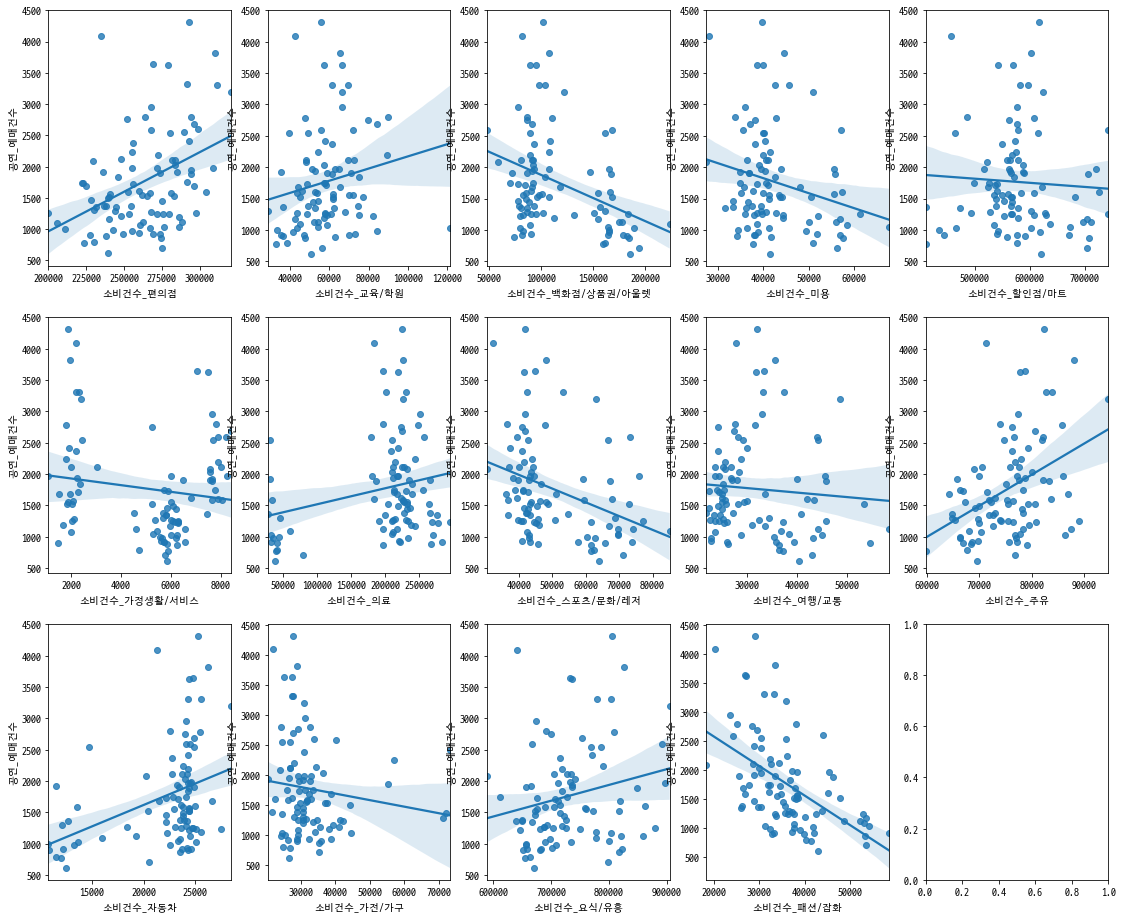

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'D2Coding'

fig, axs = plt.subplots(figsize = (19, 16), ncols = 5, nrows = 3)
x_features = corr_w_40.drop('공연_예매건수', axis = 1).columns

for i, feature in enumerate(x_features):
    row = int(i / 5)
    col = i % 5
    sns.regplot(x = feature, y = '공연_예매건수', data = corr_w_40, ax = axs[row][col])

##### 5. 50대 여성

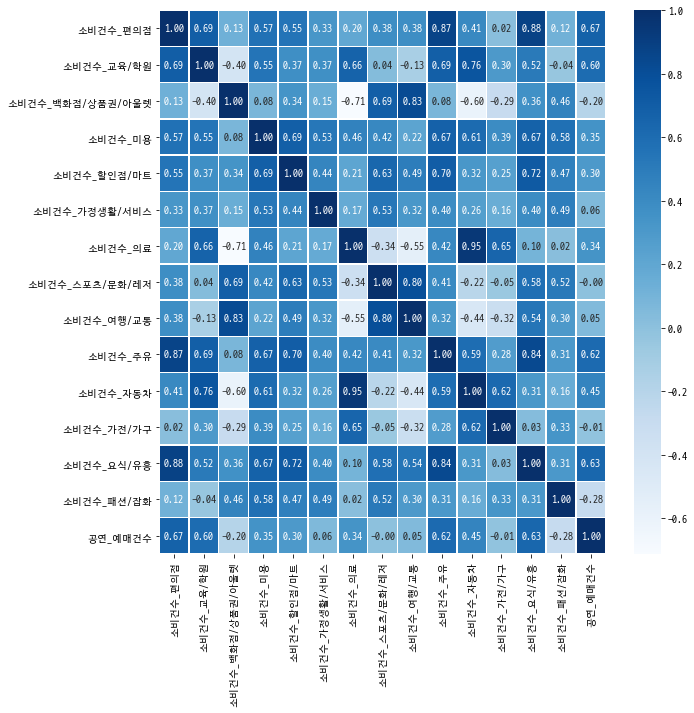

In [49]:
# 상관관계 확인
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
corr_w_50 = pd.read_csv('./data/corr_w_50.csv', index_col = 0)

plt.rcParams['font.family'] = 'D2Coding'
plt.figure(figsize = (10, 10))
sns.heatmap(data = corr_w_50.corr(), annot = True, fmt = '.2f', linewidths = .5, cmap = 'Blues')
plt.show()

In [22]:
import statsmodels.api as sm

x_data = corr_w_50.drop('공연_예매건수', axis = 1) # 변수 n개
target = corr_w_50['공연_예매건수']

# 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

In [23]:
# VIF를 통한 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data1.values, i) for i in range(x_data1.shape[1])]
vif["features"] = x_data1.columns
vif

,VIF Factor,features
0,181.397073,const
1,15.278928,소비건수_편의점
2,6.725186,소비건수_교육/학원
3,11.834506,소비건수_백화점/상품권/아울렛
4,5.222893,소비건수_미용
5,4.067600,소비건수_할인점/마트
6,2.300957,소비건수_가정생활/서비스
7,29.864254,소비건수_의료
8,6.327282,소비건수_스포츠/문화/레저
9,7.971855,소비건수_여행/교통


In [24]:
x_data = corr_w_50.drop(['공연_예매건수', '소비건수_자동차', '소비건수_편의점', '소비건수_의료', '소비건수_가정생활/서비스', '소비건수_교육/학원', '소비건수_여행/교통', '소비건수_가전/가구', '소비건수_할인점/마트', '소비건수_미용', '소비건수_주유'], axis = 1)
x_data1 = sm.add_constant(x_data, has_constant = "add")

In [25]:
# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                공연_예매건수   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     62.54
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           8.53e-25
Time:                        15:28:27   Log-Likelihood:                -577.13
No. Observations:                  92   AIC:                             1164.
Df Residuals:                      87   BIC:                             1177.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -281.2682    147.372     -1.909      0.060    -574.185      11.649
소비건수_백화점/상품권/아울렛    -0.0032      0.001     -2.995      0.004      -0.005      -0.001
소비건수_스포츠/문화/레저      -0.0094      0.004     -2.271      0.026      -0.018      -0.001
소비건수_요식/유흥           0.0043      0.000     14.070      0.000       0.004       0.005
소비건수_패션/잡화          -0.0188      0.003     -5.564      0.000      -0.026      -0.012
==============================================================================
Omnibus:                        6.129   Durbin-Watson:                   1.285
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                5.905
Skew:                           0.440   Prob(JB):                       0.0522
Kurtosis:                       3.875   Cond. No.                     5.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

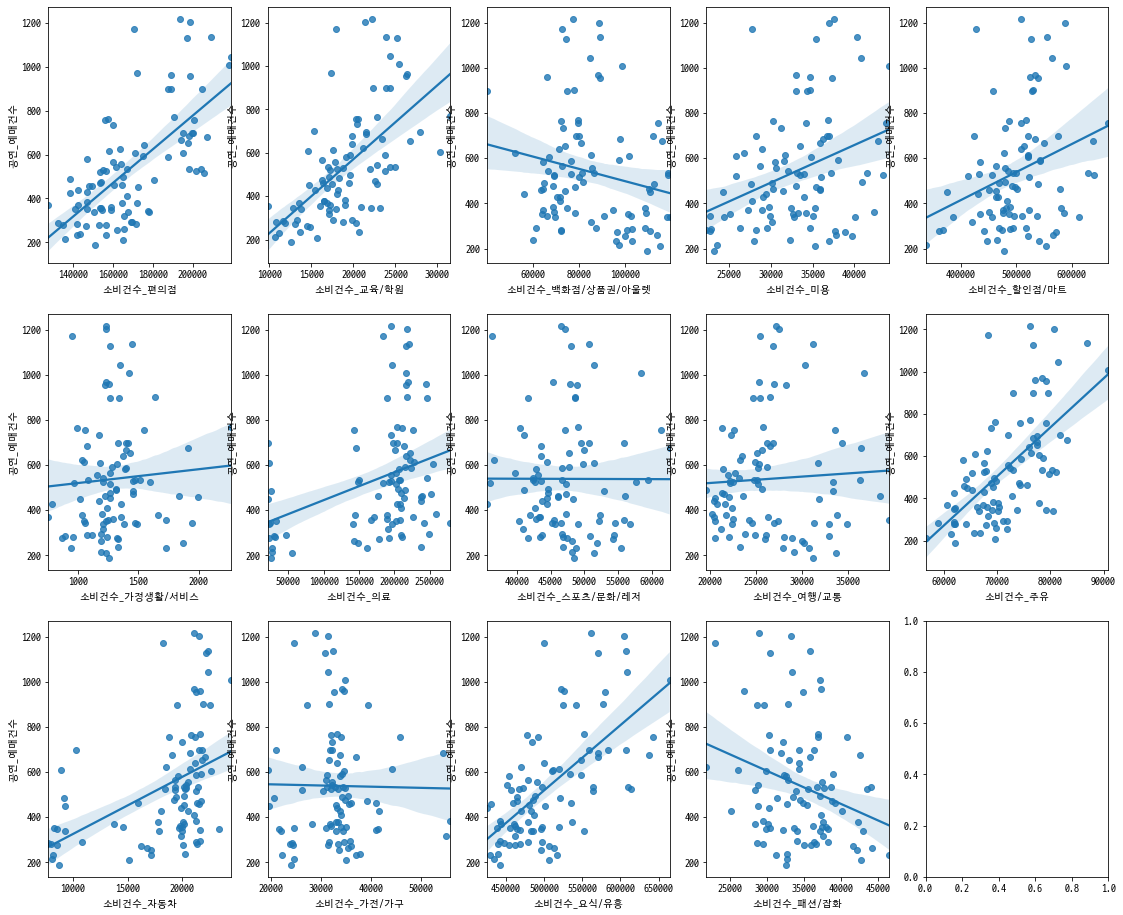

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'D2Coding'

fig, axs = plt.subplots(figsize = (19, 16), ncols = 5, nrows = 3)
x_features = corr_w_50.drop('공연_예매건수', axis = 1).columns

for i, feature in enumerate(x_features):
    row = int(i / 5)
    col = i % 5
    sns.regplot(x = feature, y = '공연_예매건수', data = corr_w_50, ax = axs[row][col])